In [9]:
#import data
import pandas as pd
df = pd.read_excel("C:/YICHEN WANG/Course/2021 FALL/INSY662/individual project/kickstarter.xlsx")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#print(df.isnull().sum())
#drop category, launch_to_state_change_days (too many missing values)

#question 1
1. Develop a classification model (i.e., a supervised-learning model where the target variable is a categorical variable) to predict whether the variable “state” will take the value “successful” or “failure.” After you obtain the final model, explain the model and justify the predictors you include/exclude.
The classification task is assumed to be done at the time each project is launched. In other words, at the moment the project owner submits the project, we execute the regression/classification model to predict whether the project is going to be successful or not.

In [10]:
#data cleaning
df = df.drop("category",axis=1)
df = df.drop("launch_to_state_change_days",axis=1)
#remove certain rows with null values
df = df.drop(df[df.name_len.isnull()].index)
df = df.drop(df[df.name_len_clean.isnull()].index)
df = df.drop(df[df.blurb_len.isnull()].index)
df = df.drop(df[df.blurb_len_clean.isnull()].index)
#drop project id and name as not useful for prediction
df = df.drop("project_id",axis=1)
df = df.drop("name",axis=1)
#drop dates as they cannot be interpreted and they have their specific data later
df = df.drop("deadline",axis=1)
df = df.drop("state_changed_at",axis=1)
df = df.drop("created_at",axis=1)
df = df.drop("launched_at",axis=1)
#drop similar columns
df = df.drop("name_len",axis=1)
df = df.drop("blurb_len",axis=1)
#state check: to eliminate all the states that are not successful or failed
df = df.drop(df[df["state"]=="live"].index)
df = df.drop(df[df["state"]=="canceled"].index)
df = df.drop(df[df["state"]=="suspended"].index)

#dummify predictors which are object
df = pd.get_dummies(df,columns = ["country","currency","deadline_weekday","state_changed_at_weekday",
                                 "created_at_weekday","launched_at_weekday"])
#print(df.state.value_counts())
#print(df.isnull().sum())

Check the correlation between state and each predictors: drop spotlight as it is perfectly correlated to state (successful/failed)

In [11]:
# df.loc[df.state == 'failed', 'state'] = 0
# df.loc[df.state == 'successful', 'state'] = 1

# column to_numeric
# df["state"] = pd.to_numeric(df["state"], downcast="integer")
# df.corr()

In [12]:
#spotlight and state is perfectly correlated, therefore drop spotlight
df = df.drop("spotlight",axis=1)
#pledged and usd_pledged are highly correlated, drop one (pledged)
df = df.drop("pledged",axis=1)
#drop all columns that cannot be used after immediate launch
df = df.drop("staff_pick",axis=1)
df = df.drop("backers_count",axis=1)
df = df.drop("usd_pledged",axis=1)
df = df.drop("state_changed_at_month",axis=1)
df = df.drop("state_changed_at_day",axis=1)
df = df.drop("state_changed_at_yr",axis=1)
df = df.drop("state_changed_at_hr",axis=1)

In [22]:
#feature selection session 8
X = df.drop("state",axis =1)
y = df['state']
#use random forest to obtain feature importance

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
model = rf.fit(X,y)
model.feature_importances_
importance = pd.DataFrame(list(zip(X.columns,model.feature_importances_)),columns=
             ['predictor','feature importance'])
print(importance.sort_values(by=['feature importance'],ascending = False).head(5))

                predictor  feature importance
0                    goal            0.108026
17  create_to_launch_days            0.068418
3          name_len_clean            0.053990
10         created_at_day            0.050391
16         launched_at_hr            0.049613


In [19]:
#create a new dataframe based on the above findings
X_new = df[['goal','create_to_launch_days','name_len_clean','created_at_day',
           'launched_at_hr']]

In [20]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.33, random_state = 0)

# Build the model
decisiontree = DecisionTreeClassifier(max_depth=5)
model = decisiontree.fit(X_train, y_train)

# Using the model to predict the results based on the test dataset
y_test_pred = model.predict(X_test)

# Calculate the mean squared error of the prediction
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(y_test, y_test_pred))

Accuracy =  0.6814757581610972


For checking the model

In [21]:
## Grading ##

# Import Grading Data
df1 = pd.read_excel("C:/YICHEN WANG/Course/2021 FALL/INSY662/individual project/Kickstarter-Grading-Sample.xlsx")
# Pre-Process Grading Data

#state check: to eliminate all the states that are not successful or failed
df1 = df1.drop(df1[df1["state"]=="live"].index)
df1 = df1.drop(df1[df1["state"]=="canceled"].index)
df1 = df1.drop(df1[df1["state"]=="suspended"].index)

#dummify predictors which are object
df1 = pd.get_dummies(df1,columns = ["country","currency","deadline_weekday","state_changed_at_weekday",
                                 "created_at_weekday","launched_at_weekday"])
# Setup the variables
X_grading = df1[['goal','create_to_launch_days','name_len_clean','created_at_day',
           'launched_at_hr']]
y_grading = df1["state"]

# Apply the model previously trained to the grading data
y_grading_pred = model.predict(X_grading)

# Calculate the accuracy score
print("Accuracy = ",accuracy_score(y_grading, y_grading_pred))

Accuracy =  0.6929949964260186


2.Develop a clustering model (i.e., an unsupervised-learning model which can group observations together) to group projects together. After you obtain the final clusters, explain the characteristics that you observe in each cluster.

In [48]:
#import dataset
df2 = pd.read_excel("C:/YICHEN WANG/Course/2021 FALL/INSY662/individual project/kickstarter.xlsx")

In [49]:
#data cleaning (drop null values)
df2 = df2.drop("category",axis=1)
df2 = df2.drop("launch_to_state_change_days",axis=1)
#remove certain rows with null values
df2 = df2.drop(df2[df2.name_len.isnull()].index)
df2 = df2.drop(df2[df2.name_len_clean.isnull()].index)
df2 = df2.drop(df2[df2.blurb_len.isnull()].index)
df2 = df2.drop(df2[df2.blurb_len_clean.isnull()].index)
#drop name as project_id alone is enough
df2 = df2.drop("name",axis=1)
df2 = df2.drop("project_id",axis=1)
#drop dates as they cannot be interpreted and they have their specific data later
df2 = df2.drop("deadline",axis=1)
df2 = df2.drop("state_changed_at",axis=1)
df2 = df2.drop("created_at",axis=1)
df2 = df2.drop("launched_at",axis=1)
#drop similar columns
df2 = df2.drop("name_len",axis=1)
df2 = df2.drop("blurb_len",axis=1)
df2 = df2.drop("usd_pledged",axis=1)
#state check: to eliminate all the states that are not successful or failed
df2 = df2.drop(df2[df2["state"]=="live"].index)
df2 = df2.drop(df2[df2["state"]=="canceled"].index)
df2 = df2.drop(df2[df2["state"]=="suspended"].index)

#dummify predictors which are object
df2 = pd.get_dummies(df2,columns = ["country","currency","deadline_weekday","state_changed_at_weekday",
                                 "created_at_weekday","launched_at_weekday"])

In [50]:
#find features for clustering
X_temp = df2.drop("state",axis =1)
y_temp = df2['state']
#use random forest to obtain feature importance

from sklearn.ensemble import RandomForestClassifier
rf_temp = RandomForestClassifier(random_state = 0)
model_temp = rf_temp.fit(X_temp,y_temp)
model_temp.feature_importances_
importance_temp = pd.DataFrame(list(zip(X_temp.columns,model_temp.feature_importances_)),columns=
             ['predictor','feature importance'])
print(importance_temp.sort_values(by=['feature importance'],ascending = False).head(5))

       predictor  feature importance
6      spotlight            0.551995
4  backers_count            0.151426
1        pledged            0.120899
0           goal            0.050762
3     staff_pick            0.024853


In [40]:
#standardize and draw clusters
df2 = pd.get_dummies(df2,columns = ["state"])
X1 = df2[['pledged','goal','staff_pick','state_successful','backers_count']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X1)

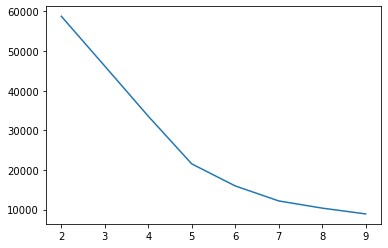

In [41]:
#determine the number of clusters required using the elbow method
from sklearn.cluster import KMeans
withiness = []
ran = range(2,10,1)
for i in range(2,10):
    kmeans = KMeans(n_clusters = i)
    model1 = kmeans.fit(X_std)
    withiness.append(model1.inertia_)
    
from matplotlib import pyplot
pyplot.plot(ran,withiness)

In [42]:
#according to the plot of elbow method, 5 clusters might be suitable
kmeans1 = KMeans(n_clusters = 5,random_state=5)
model2 = kmeans1.fit(X_std)
labels = model2.predict(X_std)

#use silhouette method to check clusters
from sklearn.metrics import silhouette_samples
silhouette_samples(X_std,labels)

from sklearn.metrics import silhouette_score

if silhouette_score(X_std,labels)>0.5:
    print("The clustering provides good evidence of the reality: score =",
          silhouette_score(X_std,labels))
else:
    print("No, try again this clustering does not work")

The clustering provides good evidence of the reality: score = 0.8561957006968562


In [43]:
count = [0]*5
for j in range(len(labels)):
    if labels[j] == 0:
        count[0]=count[0]+1
    elif labels[j] == 1:
        count[1]=count[1]+1
    elif labels[j] == 2:
        count[2]=count[2]+1
    elif labels[j] == 3:
        count[3]=count[3]+1
    else:
        count[4]=count[4]+1
            
print("cluster 1 (kmeans):",count[0])
print("cluster 2 (kmeans):",count[1])
print("cluster 3 (kmeans):",count[2])
print("cluster 4 (kmeans):",count[3])
print("cluster 5 (kmeans):",count[4])

cluster 1 (kmeans): 1788
cluster 2 (kmeans): 9918
cluster 3 (kmeans): 65
cluster 4 (kmeans): 3909
cluster 5 (kmeans): 5


In [44]:
#cluster interpretation
label_name = ['pledged','goal','staff_pick','state_successful','backers_count']
print("------------------------------------------------------ \n")

print("cluster 1 center:")
for i in range(len(label_name)): 
    print(label_name[i],"1 :",model2.cluster_centers_[0][i])
print("------------------------------------------------------ \n")

print("cluster 2 center:")
for i in range(len(label_name)): 
    print(label_name[i],"2 :",model2.cluster_centers_[1][i])
print("------------------------------------------------------ \n")

print("cluster 3 center:")
for i in range(len(label_name)): 
    print(label_name[i],"3 :",model2.cluster_centers_[2][i])
print("------------------------------------------------------ \n")
   
print("cluster 4 center:")
for i in range(len(label_name)): 
    print(label_name[i],"4 :",model2.cluster_centers_[3][i])
print("------------------------------------------------------ \n")

print("cluster 5 center:")
for i in range(len(label_name)): 
    print(label_name[i],"5 :",model2.cluster_centers_[4][i])


------------------------------------------------------ 

cluster 1 center:
pledged 1 : 0.38757070811727196
goal 1 : -0.03410676564752351
staff_pick 1 : 2.7430742829422456
state_successful 1 : 0.9399480221514396
backers_count 1 : 0.28563814488535794
------------------------------------------------------ 

cluster 2 center:
pledged 2 : -0.16468475042876568
goal 2 : 0.0023512489242295824
staff_pick 2 : -0.36455447313931577
state_successful 2 : -0.7231620803833063
backers_count 2 : -0.13863539155841245
------------------------------------------------------ 

cluster 3 center:
pledged 3 : 11.34415725159341
goal 3 : 0.0672023362746623
staff_pick 3 : 2.121548531725937
state_successful 3 : 1.3828158681521978
backers_count 3 : 9.296862267761941
------------------------------------------------------ 

cluster 4 center:
pledged 4 : 0.05216163589110466
goal 4 : -0.05426208070973945
staff_pick 4 : -0.3645544731393083
state_successful 4 : 1.3828158681521938
backers_count 4 : 0.06669822865514535
----